In [19]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\laan\AppData\Local\Temp\ipykernel_21460\2179968423.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax.boxplot(


✅ Black & white boxplot saved as SVG/PNG with stats CSV


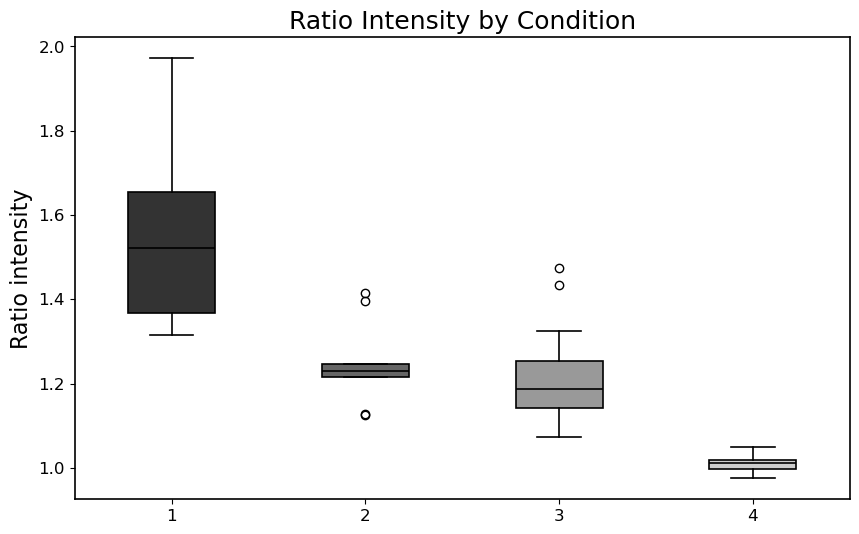

In [30]:
# Path to the folder with CSV files
folder = "W:\\Users\\Daphne\\WT_RESULTS\\WT_feeding\\"

# Get all CSV files in the folder
csv_files = glob.glob(os.path.join(folder, "*.csv"))

# Dictionary to hold data
data_dict = {}

# Read each CSV and extract "Ratio intensity" column
for file in csv_files:
    condition_name = os.path.splitext(os.path.basename(file))[0]  # filename without extension
    df = pd.read_csv(file)

    if "Ratio intensity" in df.columns:
        data_dict[condition_name] = df["Ratio intensity"].dropna()
    else:
        print(f"Warning: 'Ratio intensity' not found in {file}")



# sort data_dict by keys
data_dict = dict(sorted(data_dict.items()))

# Convert to DataFrame for plotting
plot_df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in data_dict.items()]))

# Set style: white background, black axes
plt.style.use("default")
plt.rcParams.update({
    "axes.edgecolor": "black",
    "axes.linewidth": 1.2,
    "axes.labelsize": 14,
    "xtick.labelsize": 12,
    "ytick.labelsize": 12,
    "legend.fontsize": 12,
    "font.size": 14
})

# Create boxplot
fig, ax = plt.subplots(figsize=(10, 6))

# Grayscale colors from dark to bright
num_conditions = len(data_dict)
greys = [str(x) for x in np.linspace(0.2, 0.8, num_conditions)]  # 0=black, 1=white

# Plot each condition manually to color boxes
box = ax.boxplot(
    [data_dict[k] for k in data_dict.keys()],
    patch_artist=True,
    labels=list(data_dict.keys())
)


# for i, (key, values) in enumerate(data_dict.items(), start=1):
#     ax.scatter(np.random.normal(i, 0.04, size=len(values)), values, alpha=1.0, color='red', s=20)


# Apply grayscale fill to boxes
for patch, color in zip(box['boxes'], greys):
    patch.set_facecolor(color)
    patch.set_edgecolor("black")
    patch.set_linewidth(1.2)

# Style other elements
for element in ['whiskers', 'caps', 'medians']:
    for line in box[element]:
        line.set_color("black")
        line.set_linewidth(1.2)

ax.set_ylabel("Ratio intensity", fontsize=16)
ax.set_title("Ratio Intensity by Condition", fontsize=18)

# name x ticks manually
# ax.set_xticklabels(list(data_dict.keys()), rotation=45, ha='right')
ax.set_xticklabels(('1', '2', '3', '4'))

# Save plot
fig.savefig(os.path.join(folder, "ratio_intensity_boxplot.svg"), format="svg", bbox_inches="tight")
fig.savefig(os.path.join(folder, "ratio_intensity_boxplot.png"), format="png", dpi=300, bbox_inches="tight")

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))

print("✅ Black & white boxplot saved as SVG/PNG with stats CSV")



C:\Users\laan\AppData\Local\Temp\ipykernel_21460\4026752422.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))


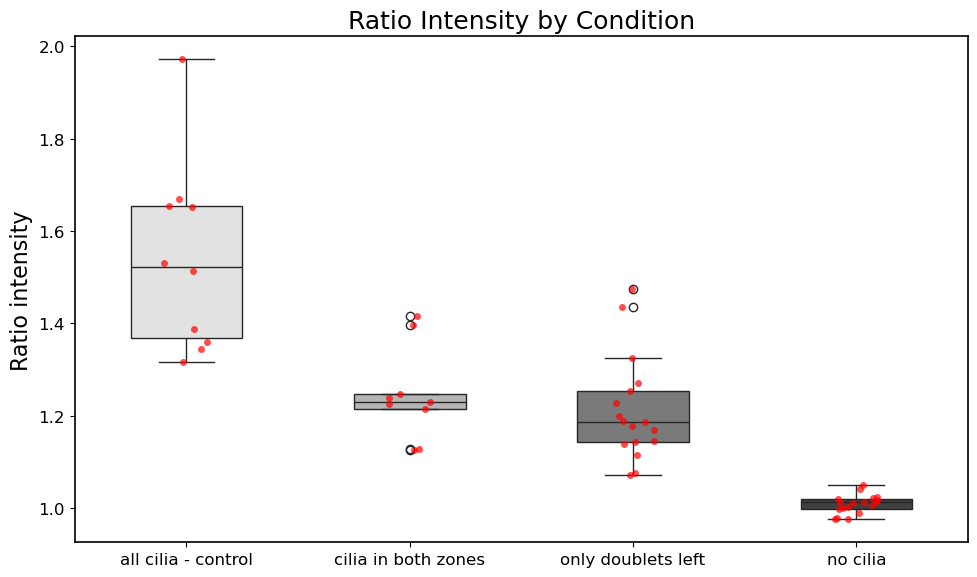

In [33]:
plt.figure(figsize=(10, 6))
ax = plt.subplot(1, 1, 1, facecolor='white')
sns.boxplot(data=data_dict, palette="Greys", width=0.5)
sns.stripplot(data=data_dict, color='red', size=5, jitter=True, alpha=0.7)
plt.ylabel("Ratio intensity", fontsize=16)
plt.title("Ratio Intensity by Condition", fontsize=18)
# plt.xticks(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))
ax.set_xticklabels(('all cilia - control', 'cilia in both zones', 'only doublets left', 'no cilia'))
plt.tight_layout()
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot.svg"), format="svg", bbox_inches="tight")
plt.savefig(os.path.join(folder, "ratio_intensity_boxplot.png"), format="png", dpi=300, bbox_inches="tight")
plt.show()

# Save boxplot stats to CSV
stats = plot_df.describe().transpose()
stats.to_csv(os.path.join(folder, "ratio_intensity_boxplot_stats.csv"))